In [1]:
import pandas as pd
import numpy as np

In [21]:
cols = ['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       "CS in Team's Jungle", 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken']

In [22]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0).drop(columns=['Year', 'Game ID', 'Victory'])

agreession_time_link = ['Kills', 'Deaths', 'Assists', 'KDA', 'Physical Damage', 'Magic Damage', 'True Damage', 'Total damage to Champion', 'Total damage taken', 'Total heal', 'Time ccing others', 'Damage dealt to turrets']
agression_df = df[['Kills', 'Deaths', 'Assists', 'KDA', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills', 'Penta kills', 'KP%', 'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%', 'Total damage to Champion', 'Total damage taken', 'Total heal', 'Time ccing others', 'Damage dealt to turrets']].copy()
agression_df[agreession_time_link] = agression_df[agreession_time_link].div(df['Game Duration'], axis=0)

setup_time_link = ['Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased']
setup_df = df[['Time ccing others', 'Assists', 'Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'VS%']].copy()
setup_df[setup_time_link] = setup_df[setup_time_link].div(df['Game Duration'], axis=0)

economy_time_link = ['CS', "CS in Team's Jungle", 'Golds']
economy_df = df[['CS', "CS in Team's Jungle", 'Golds']].copy()
economy_df[economy_time_link] = economy_df[economy_time_link].div(df['Game Duration'], axis=0)

early_game_df = df[['GD@15', 'CSD@15', 'XPD@15', 'LVLD@15']]


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
old = agression_df
agression_df = scaler.fit_transform(agression_df)
setup_df = scaler.fit_transform(setup_df)
economy_df = scaler.fit_transform(economy_df)
early_game_df = scaler.fit_transform(early_game_df)


[[-1.64181064]
 [ 0.14608101]
 [ 0.25252311]
 ...
 [-1.01492913]
 [ 1.55113033]
 [-1.95543689]]


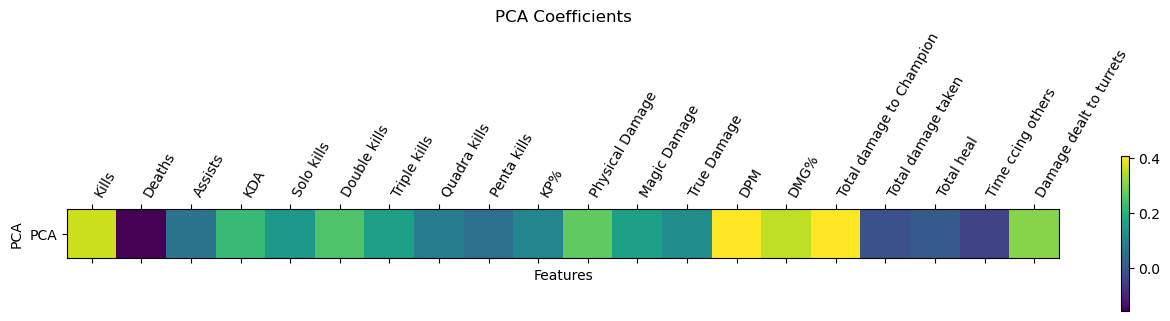

0.36243252469296183 Kills
-0.1580768907352738 Deaths
0.06004687100739949 Assists
0.22522501212126828 KDA
0.14361835772684498 Solo kills
0.25094204800534015 Double kills
0.15999424495870757 Triple kills
0.08090013965085566 Quadra kills
0.04914971103091458 Penta kills
0.10148171764323557 KP%
0.2678713994308281 Physical Damage
0.16304263516502984 Magic Damage
0.11923064086703883 True Damage
0.40620901718494085 DPM
0.352731522233975 DMG%
0.40620998872996134 Total damage to Champion
-0.01875318408153848 Total damage taken
0.002620787412401367 Total heal
-0.04249769256407689 Time ccing others
0.30284761132502275 Damage dealt to turrets


In [26]:
# PCA for agression to deduce the most important features to get weights for the weighted score calculation

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
agression_pca = pca.fit_transform(agression_df)
print(agression_pca)

# Plotting cooefficients with the original features

import matplotlib.pyplot as plt

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(old.columns)), old.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

# Priting value and feature name

for value, feature in zip(pca.components_[0], old.columns):
    print(value, feature)